# Notebook Imports and Packages

In [679]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #color map

from sympy import symbols, diff

from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function
### $f(x)= x^2 + x + 1 $
LaTex for formatting mathematical equations

In [680]:
def f(x):
    return x**2+x+1

In [681]:
#Make Data
x_1 = np.linspace(start=-3,stop=3, num=500)


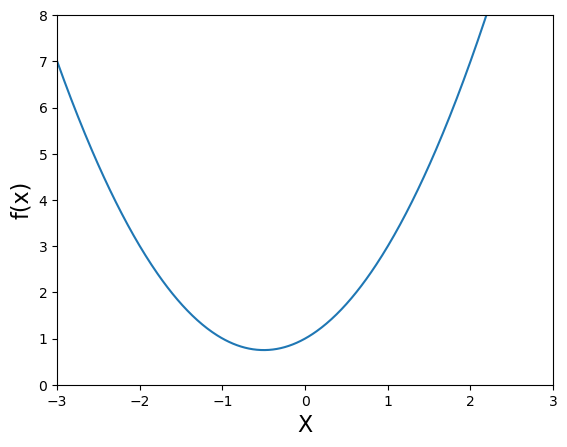

In [682]:
#Plot
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1,f(x_1))
plt.show()

## Slope & Derivatives
Challange: Create a python function for the derivative of $f(x)$ called $df(x)$

In [683]:
def df(x):
    return 2*x + 1

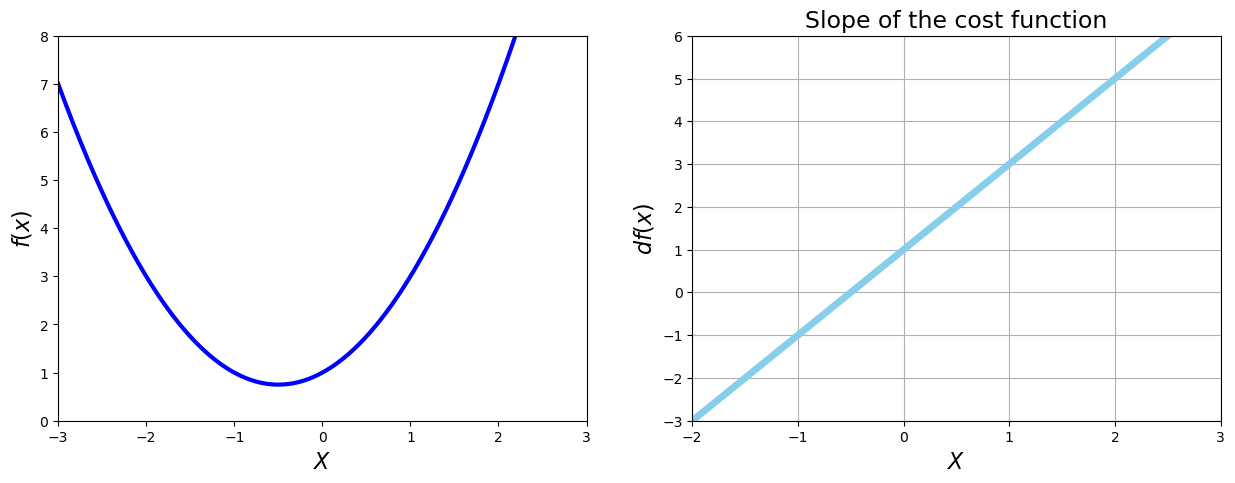

In [684]:
#Plot function and derivative side by side
plt.figure(figsize=[15,5])

# Chart: Cost function 
plt.subplot(1,2,1)
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('$X$', fontsize=16)
plt.ylabel('$f(x)$', fontsize=16)
plt.plot(x_1,f(x_1), color='blue',linewidth=3)

# Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('$X$', fontsize=16)
plt.ylabel('$df(x)$', fontsize=16)
plt.grid()
plt.xlim([-2,3])
plt.ylim([-3,6])
plt.plot(x_1, df(x_1), color='skyblue',linewidth=5)
plt.show()

## Python Loops & Gradient Descent

In [685]:
#Python For Loop
for counter in range(5):
    print('Hello World', counter)
print('End of Loop')

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
End of Loop


In [686]:
#Python While Loop
counter = 0 
while counter < 7:
    print('...counting', counter)
    counter += 1
print('done')

...counting 0
...counting 1
...counting 2
...counting 3
...counting 4
...counting 5
...counting 6
done


In [687]:
#Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list =[df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier*gradient
    step_size = abs(new_x - previous_x)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    # print(step_size)
    if step_size < precision:
        print('loop run this many times:', n)
        break


print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))


loop run this many times: 40
Local minimum occurs at: -0.49962781616118024
Slope or df(x) value at this point is: 0.0007443676776395236
f(x) value or cost at this point is: 0.7500001385208099


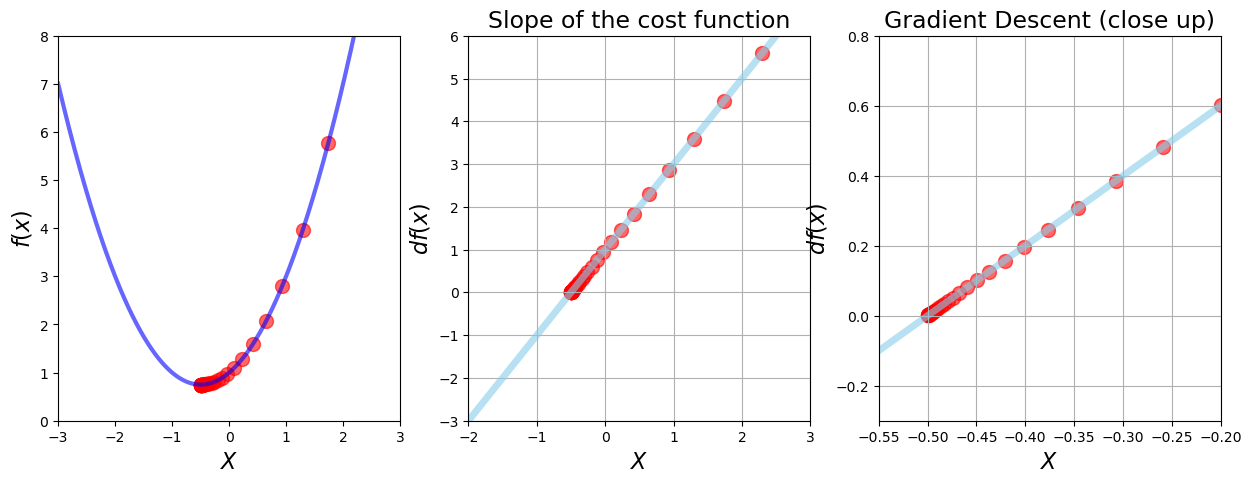

In [688]:
#Superimpose the gradient descent calculations on plot function and derivative side by side
plt.figure(figsize=[15,5])

# Chart: Cost function 
plt.subplot(1,3,1)
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('$X$', fontsize=16)
plt.ylabel('$f(x)$', fontsize=16)
plt.plot(x_1,f(x_1), color='blue',linewidth=3, alpha=0.6)

values = np.array(x_list)


plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# Chart: Derivative
plt.subplot(1,3,2)
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('$X$', fontsize=16)
plt.ylabel('$df(x)$', fontsize=16)
plt.grid()
plt.xlim([-2,3])
plt.ylim([-3,6])
plt.plot(x_1, df(x_1), color='skyblue',linewidth=5, alpha=0.6)

plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.6)

# Chart: Derivative (Close Up)
plt.subplot(1,3,3)
plt.title('Gradient Descent (close up)',fontsize=17)
plt.xlabel('$X$', fontsize=16)
plt.ylabel('$df(x)$', fontsize=16)
plt.grid()
plt.xlim([-0.55,-0.2])
plt.ylim([-0.3,0.8])
plt.plot(x_1, df(x_1), color='skyblue',linewidth=5, alpha=0.6)

plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.6)

plt.show()

# Examaple 2 - Multiple Minima Vs Initial Guess & Advanced Functions
## $$g(x) = x^4  - 4x^2 + 5$$

In [689]:
# Make some data
x_2 = np.linspace(-2,2,1000)
def g(x):
    return x**4 - 4*x**2 + 5
def dg(x):
    return 4*x**3 - 4*2*x


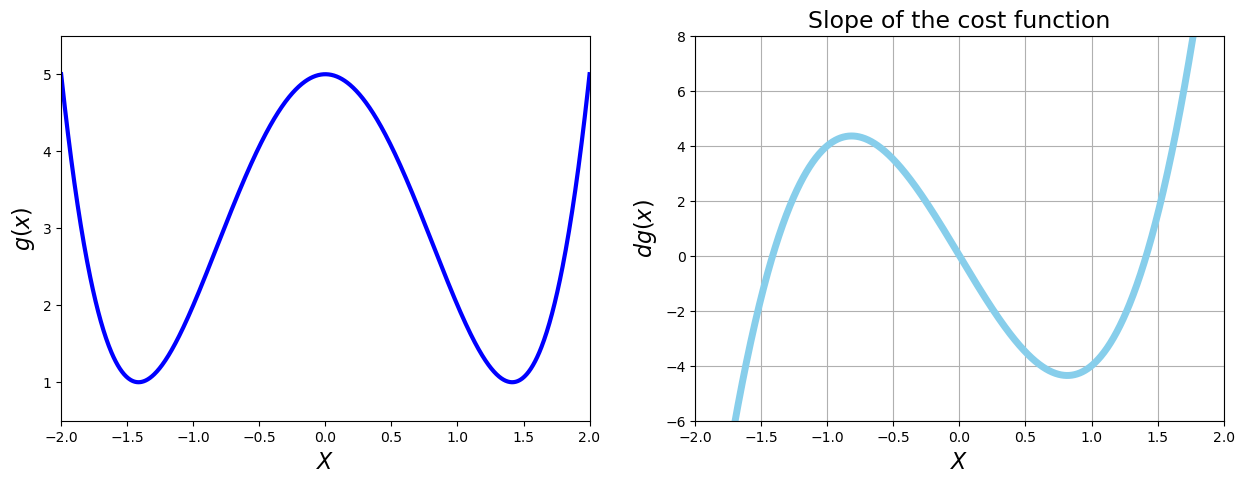

In [690]:
#Plot function and derivative side by side
plt.figure(figsize=[15,5])

# Chart: Cost function 
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.xlabel('$X$', fontsize=16)
plt.ylabel('$g(x)$', fontsize=16)
plt.plot(x_2,g(x_2), color='blue',linewidth=3)

# Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('$X$', fontsize=16)
plt.ylabel('$dg(x)$', fontsize=16)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.plot(x_2, dg(x_2), color='skyblue',linewidth=5)
plt.show()

# Gradient Descent as a Python Function

In [691]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    #indent group - cmd + ]
    new_x = initial_guess
    x_list = [new_x]
    slope_list =[derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier*gradient
        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [692]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.5, multiplier=0.02, precision=0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x)) #len(list) returns the number of items in a list

Local min occurs at: 1.4122375085019094
Number of steps: 23


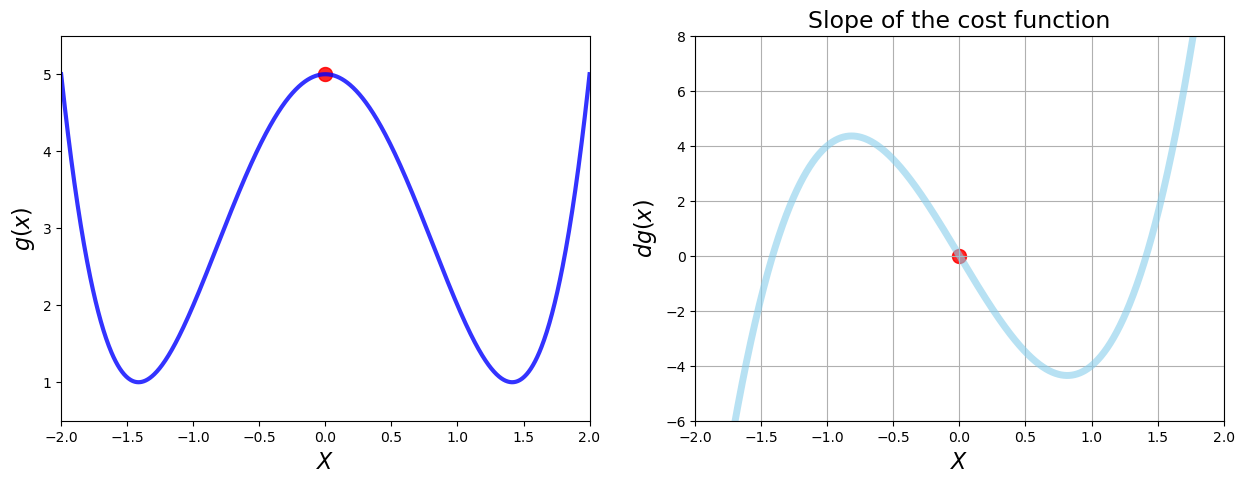

In [693]:
#Calling gradient descent function 
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0, multiplier=0.02, precision=0.001)
#Plot function and derivative and scatter plot side by side
plt.figure(figsize=[15,5])

# Chart: Cost function 
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.xlabel('$X$', fontsize=16)
plt.ylabel('$g(x)$', fontsize=16)
plt.plot(x_2,g(x_2), color='blue',linewidth=3, alpha = 0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6) #the g function does not play well with list so numpy converts to array

# Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('$X$', fontsize=16)
plt.ylabel('$dg(x)$', fontsize=16)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.plot(x_2, dg(x_2), color='skyblue',linewidth=5, alpha = 0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)
plt.show()

# Example 3 - Divergence, Overflow and Python Tuples
## $$h(x)=x^5 - 2x^4 + 2$$

In [694]:
#Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 +2

def dh(x):
    return 5*x**4 - 8*x**3



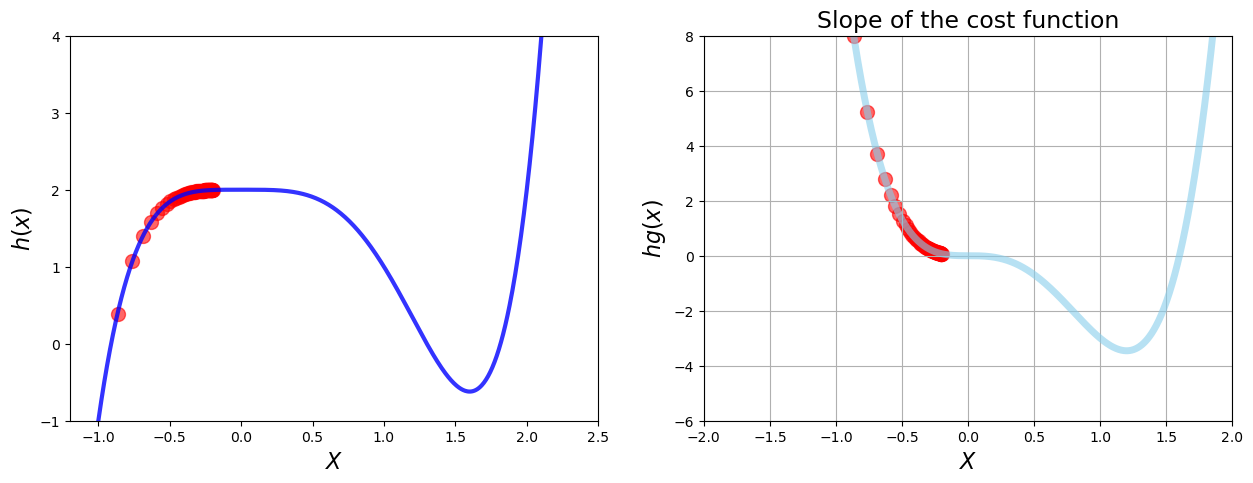

Local min occurs at:  -1.8398461123332792e+24
Cost at this minimum is:  -2.1081790694225687e+121
Number of steps:  72


In [695]:
#Calling gradient descent function 
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, multiplier=0.02, precision=0.001, max_iter=71)
#Plot function and derivative and scatter plot side by side
plt.figure(figsize=[15,5])

# Chart: Cost function 
plt.subplot(1,2,1)
plt.xlim([-1.2,2.5])
plt.ylim([-1,4])
plt.xlabel('$X$', fontsize=16)
plt.ylabel('$h(x)$', fontsize=16)
plt.plot(x_3,h(x_3), color='blue',linewidth=3, alpha = 0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6) #the g function does not play well with list so numpy converts to array

# Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('$X$', fontsize=16)
plt.ylabel('$hg(x)$', fontsize=16)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.plot(x_3, dh(x_3), color='skyblue',linewidth=5, alpha = 0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)
plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

In [696]:
import sys 
# sys.version
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [697]:
# Creating a tuple - tuple packing
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17

#How to access a value in a tuple
print('I love', breakfast[0])
print('My hotel has no ' + str(unlucky_numbers[1]) + 'th floor')

not_my_address = 1, "Infinite Loop", "Cupertino", 95014
# breakfast[0] = 'sausage' #this will not work because tuples are immutable
#Once you have created a tuple, you cannot change its values. Tuples are unchangeable, or immutable as it also is called.

tuple_with_single_value = 13, #this is a tuple with a single value
type(tuple_with_single_value)

main, side, greens = breakfast #sequence unpacking

print('Main course is ', main)

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min occurs at: ', data_tuple[0])
print('cost at the last x value is', h(data_tuple[0]))
print('Number of steps: ', len(data_tuple[1])) 

I love bacon
My hotel has no 4th floor
Main course is  bacon
Local min occurs at:  1.5989534547394717
cost at the last x value is -0.6214287992331258
Number of steps:  117


# The Learning Rate

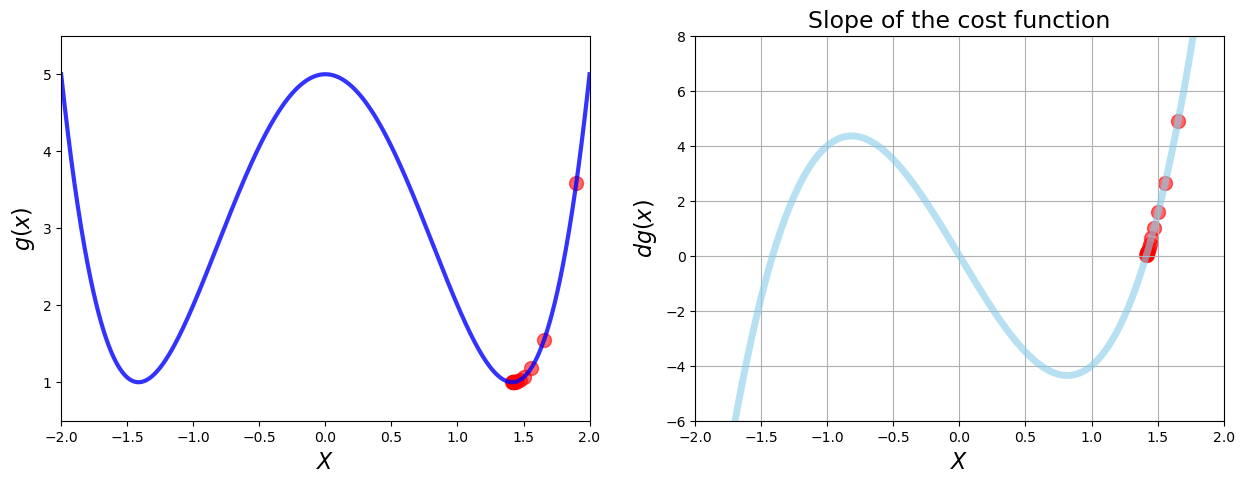

Number of steps:  14


In [698]:
#Calling gradient descent function 
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.02, precision=0.001, max_iter=500)
#Plot function and derivative and scatter plot side by side
plt.figure(figsize=[15,5])

# Chart: Cost function 
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.xlabel('$X$', fontsize=16)
plt.ylabel('$g(x)$', fontsize=16)
plt.plot(x_2,g(x_2), color='blue',linewidth=3, alpha = 0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6) #the g function does not play well with list so numpy converts to array

# Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('$X$', fontsize=16)
plt.ylabel('$dg(x)$', fontsize=16)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.plot(x_2, dg(x_2), color='skyblue',linewidth=5, alpha = 0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)
plt.show()

print('Number of steps: ', len(list_x))

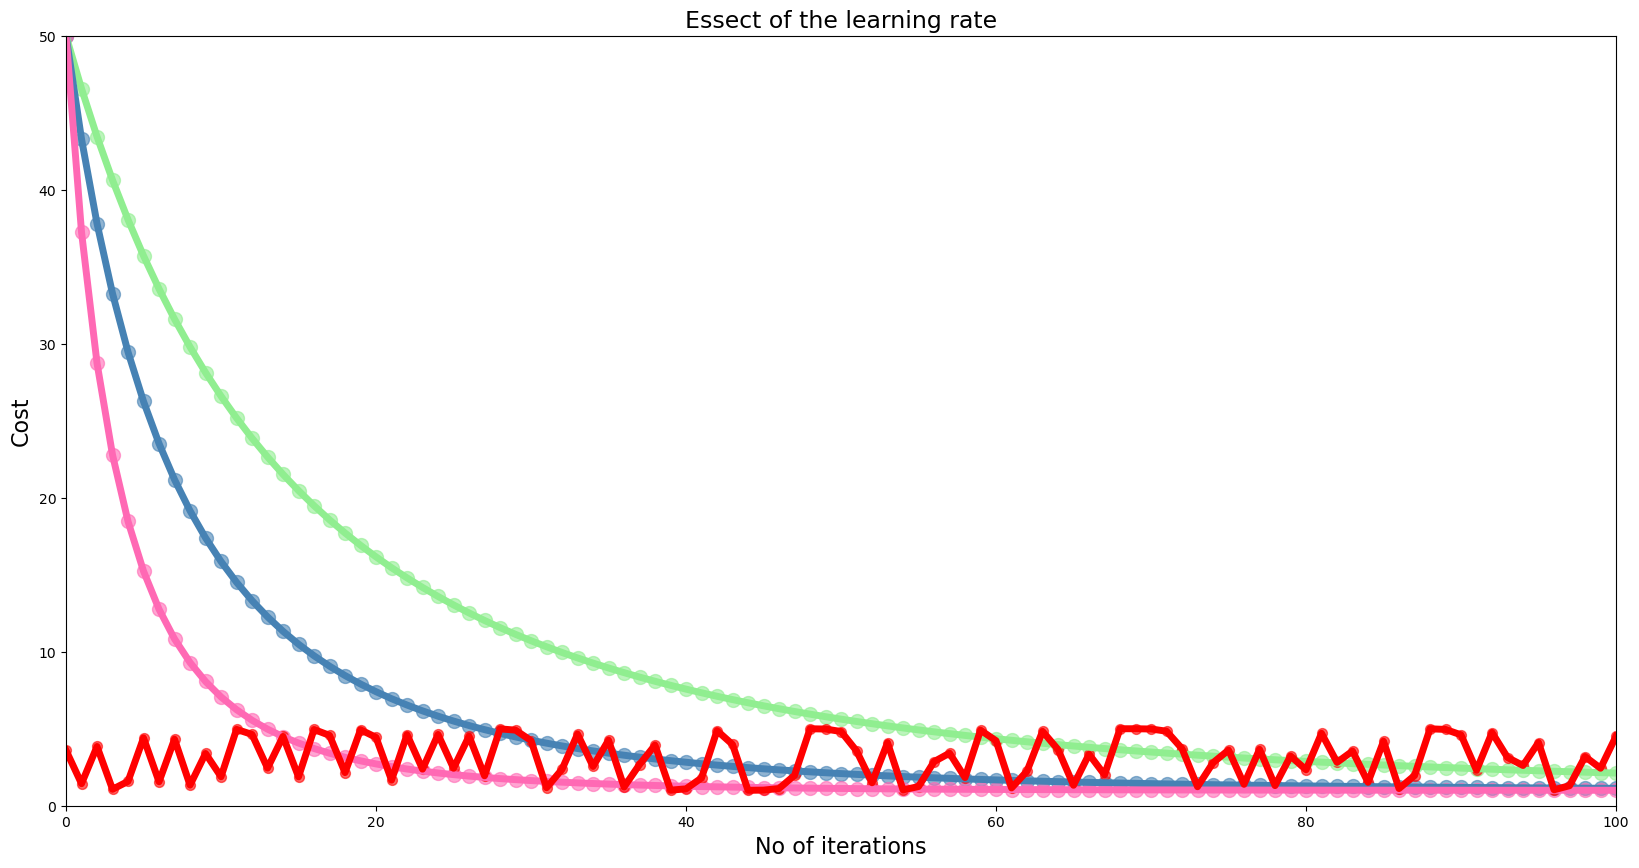

In [699]:
#Run gradient descent 3 times
n=100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)

med_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)  

#Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n)  


#Plotting reduction in cost for each iteration
plt.figure(figsize=[20,10])

# Chart: Cost function 
plt.xlim([0,n])
plt.ylim([0,50])
plt.title("Essect of the learning rate", fontsize=17)
plt.xlabel('No of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

#Values for chart
# 1) Y Axis Data: Convert the list to a numpy array and square each element
low_values = np.array(low_gamma[1])
med_values = np.array(med_gamma[1])
high_values = np.array(high_gamma[1])
# 2) X Axis Data: Create a list from 0 to n+1
iteration_list = list(range(0,n+1))

#Plotting low learning rate
plt.plot(iteration_list,g(low_values), color='lightgreen',linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=100, alpha=0.6) #the g function does not play well with list so numpy converts to array

#Plotting medium learning rate
plt.plot(iteration_list,g(med_values), color='steelblue',linewidth=5)
plt.scatter(iteration_list, g(med_values), color='steelblue', s=100, alpha=0.6) #the g function does not play well with list so numpy converts to array

#Plotting high learning rate
plt.plot(iteration_list,g(high_values), color='hotpink',linewidth=5)
plt.scatter(iteration_list, g(high_values), color='hotpink', s=100, alpha=0.6) #the g function does not play well with list so numpy converts to array

#Plotting insane learning rate
plt.plot(iteration_list,g(np.array(insane_gamma[1])), color='red',linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red', s=50, alpha=0.6) #the g function does not play well with list so numpy converts to array

# Example 4 - Data Vis with 3D Charts

## Minise $$f(x,y) = \frac{1}{3^{-x^2 - y^2}+1}$$

Minimise $$ f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2 - y^2}$


In [700]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1/(r+1)



In [701]:
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)

print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


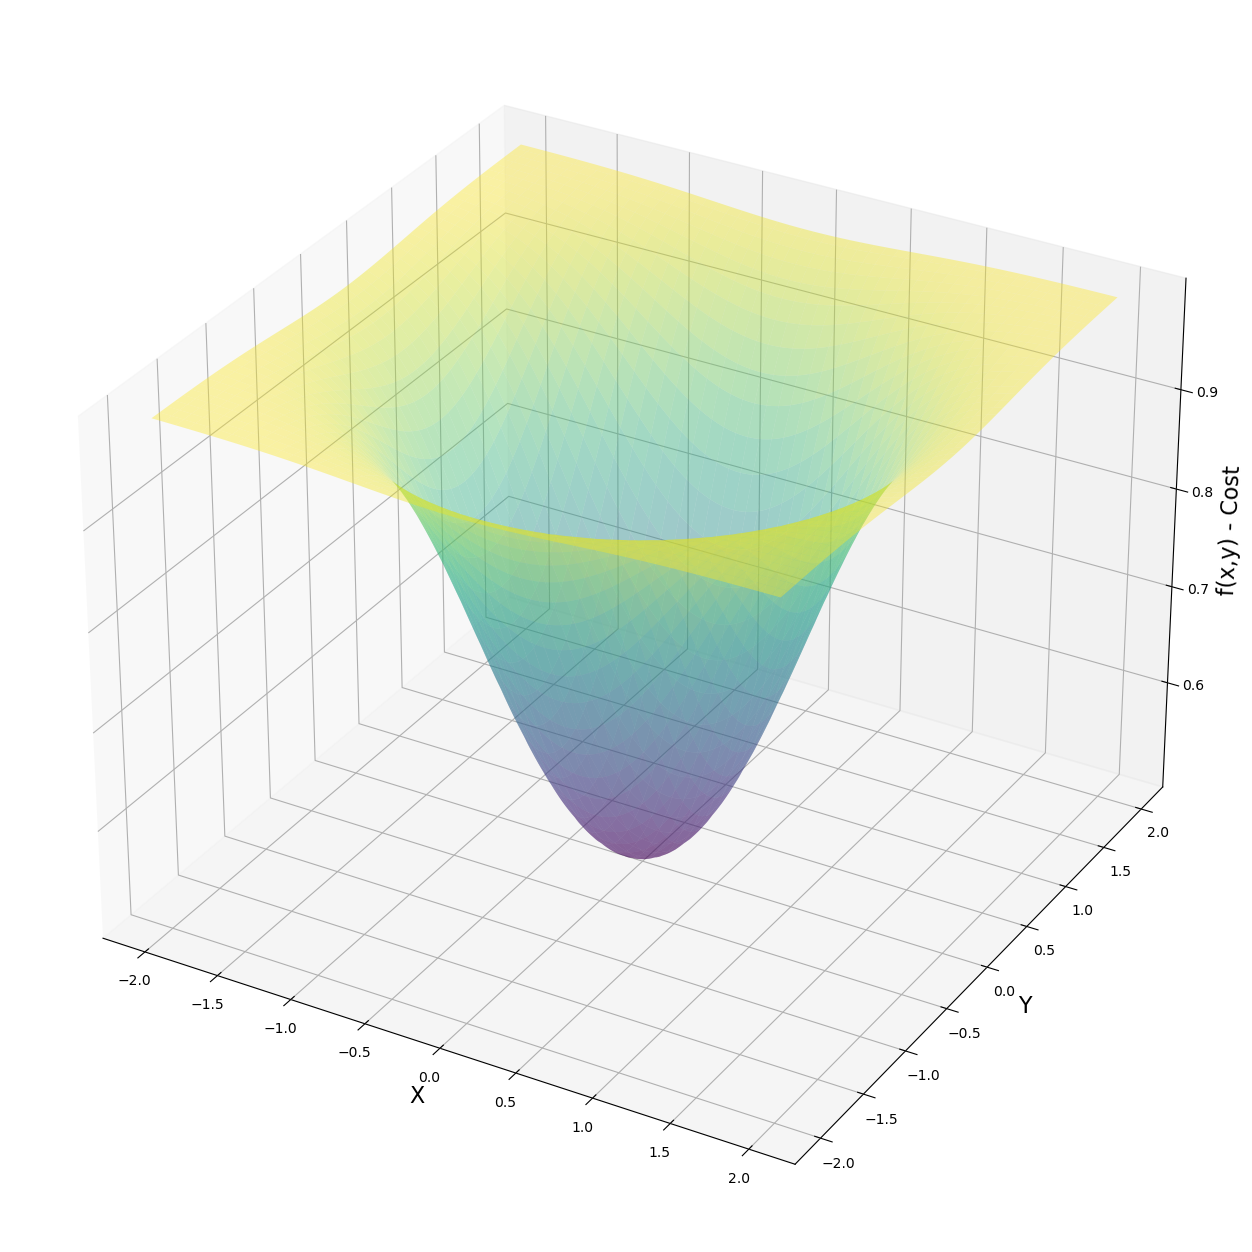

In [702]:
# Generating 3D plot
fig = plt.figure(figsize=[16,16])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X', fontsize=16)
ax.set_ylabel('Y', fontsize=16)
ax.set_zlabel('f(x,y) - Cost', fontsize=16)

ax.plot_surface(x_4, y_4, f(x_4,y_4), cmap=cm.viridis, alpha=0.4)
plt.show()

# Partial Derivatives & Symbolic Computation
## $$\frac{\partial f}{\partial x} = \frac {2x \ln(3) \cdot 3^{-x^2 -y^2}}{\left(3^{-x^2 - y^2} + 1 \right) ^2}$$
## $$\frac{\partial f}{\partial y} = \frac {2y \ln(3) \cdot 3^{-x^2 -y^2}}{\left(3^{-x^2 - y^2} + 1 \right) ^2}$$

In [703]:
a, b = symbols('x, y')

print('Cost function', f(a,b))
print('Partial derivative wrt x is: ', diff(f(a,b), a))
print('Value of f(x,y) at x=1.8 y=1.0 is: '
      ,f(a,b).evalf(subs={a:1.8, b:1.0})) #Python dictionary Key Value pair
print('The value of the slope with respect to x at x=1.8 y=1.0 is: ', diff(f(a,b), a).evalf(subs={a:1.8, b:1.0}))

Cost function 1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is:  0.990604794032582
The value of the slope with respect to x at x=1.8 y=1.0 is:  0.0368089716197505


## Batch Gradient Descent with SymPy

In [704]:
#Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients

#Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


## Partial Derivatives as Python Functions

In [705]:
def fpx(x,y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r/(r+1)**2

def fpy(x,y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r/(r+1)**2


In [706]:
#Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients

#Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


## Graphing 3D Gradient Descent and Advanced Numpy Arrays

In [707]:
#Setup
multiplier = 0.5
max_iter = 500
params = np.array([2, 1.0]) #initial guess
values_array = params.reshape(1,2)
print(values_array)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    # values_array = np.append(values_array, params.reshape(1,2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis=0)

#Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


[[2. 1.]]
Values in gradient array [1.39910018e-66 6.99550090e-67]
Minimum occurs at x value of:  1.8474816416263903e-66
Minimum occurs at y value of:  9.237408208131952e-67
The cost is:  0.5


In [708]:
#Advanced Numpy Array Practice

kirk = np.array([['Captain','Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'],['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0]', hs_band[0])
print('hs_band[0][1]', hs_band[1][0])

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)
print('Printing nicknames...', the_roots[:,0])# : means all rows, 0 means first column

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing band roles...', the_roots[:,1]) 

(1, 2)
(2, 2)
hs_band[0] ['Black Thought' 'MC']
hs_band[0][1] Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain']
Printing band roles... ['MC' 'Drums' 'Guitar' 'MC']


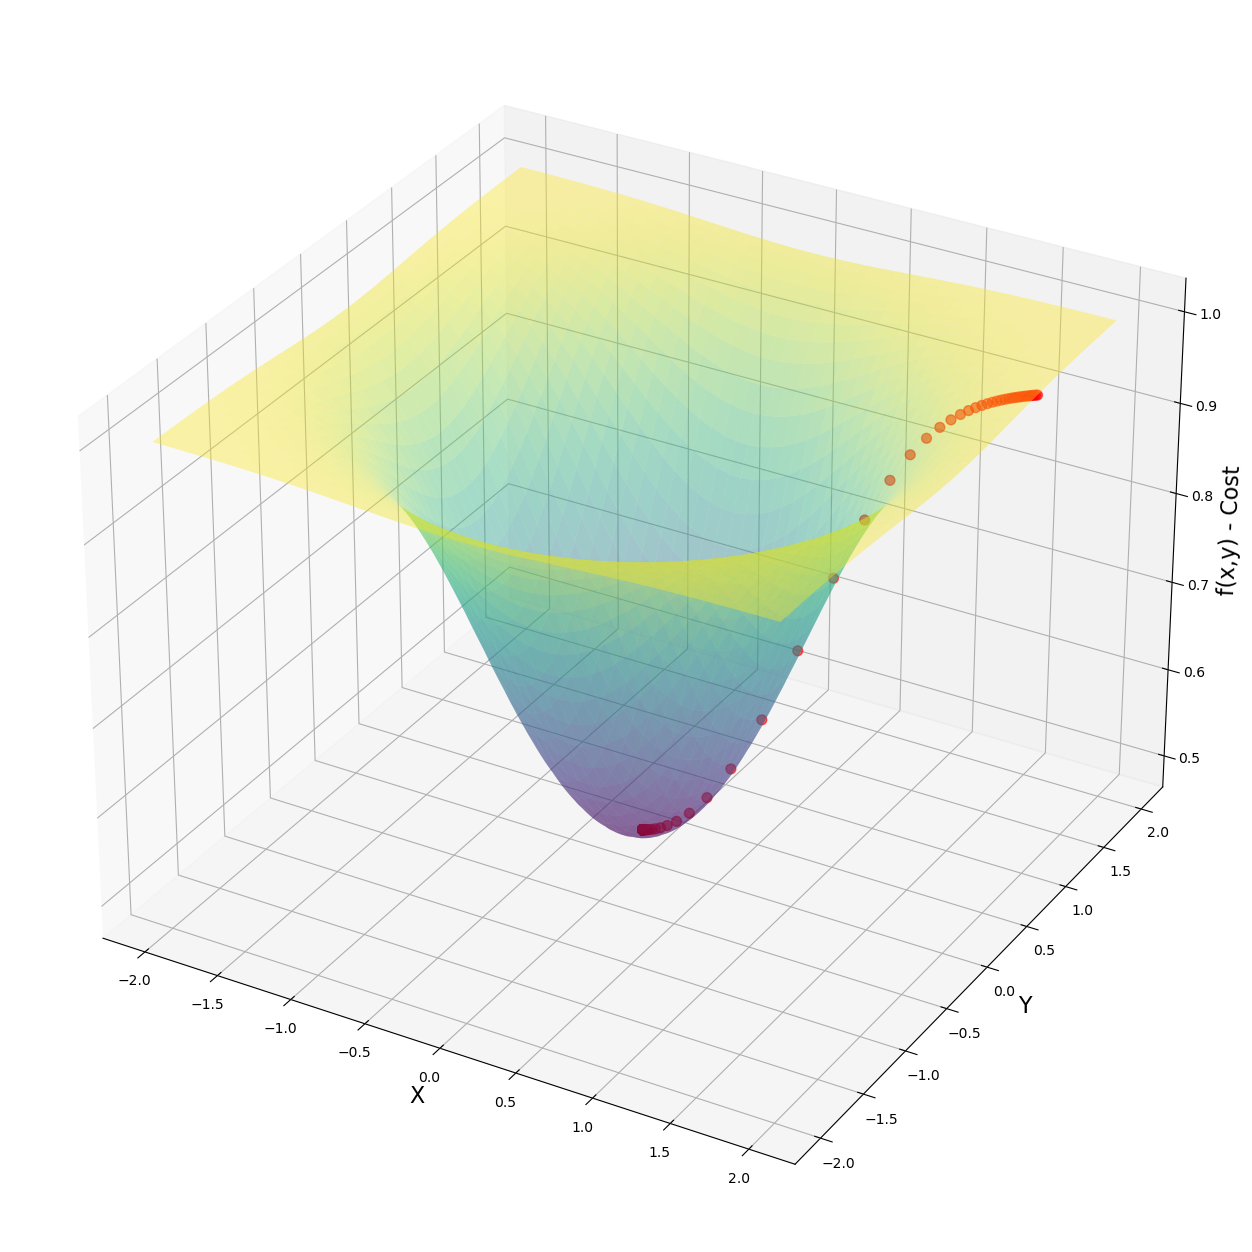

In [709]:
# Generating 3D plot
fig = plt.figure(figsize=[16,16])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X', fontsize=16)
ax.set_ylabel('Y', fontsize=16)
ax.set_zlabel('f(x,y) - Cost', fontsize=16)

ax.plot_surface(x_4, y_4, f(x_4,y_4), cmap=cm.viridis, alpha=0.4)
ax.scatter(values_array[:,0],values_array[:,1],
           f(values_array[:,0],values_array[:,1]), color='red', s=50, alpha=0.6)
plt.show()

#Example 5 - Working with Data and a Real Cost Function
## Mean Squared Error: a cost function for regression problems
### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}\big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}\big)^2 $$
alternative:
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y}\big)^2 $$

In [710]:
#Make sample data
x_5 = np.array([[0.1,1.2,2.4,3.2,4.1,5.7,6.5]]).transpose() #take one dimensional array and convert to two dimensional array
y_5 = np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2]).reshape(7,1) #reshape is another way to convert one dimensional array to two dimensional array

print('Shape of x_5 array', x_5.shape)
print('Shape of y_5 array', y_5.shape)


Shape of x_5 array (7, 1)
Shape of y_5 array (7, 1)


In [711]:
#Quick linear regression

regr = LinearRegression()
regr.fit(x_5,y_5)
print('Theta 0 (intercept):', regr.intercept_[0])
print('Theta 1 (slope):', regr.coef_[0][0])

Theta 0 (intercept): 0.8475351486029545
Theta 1 (slope): 1.2227264637835913


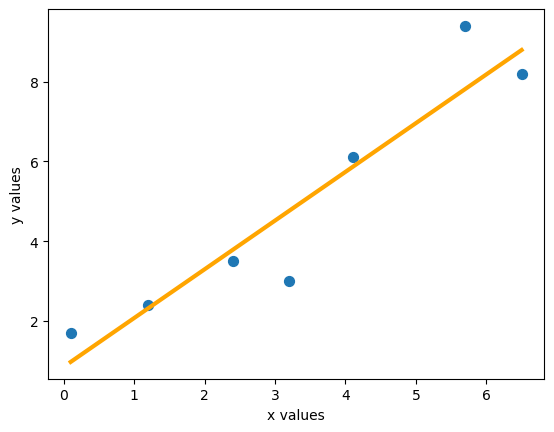

In [712]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [713]:
#y_hat = theta0 + theta1*x
y_hat = 0.8475351486029545 + 1.2227264637835913*x_5
print('Estimated values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Estimated values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [714]:
#Challange: write a python function mse(y, y_hat) return MSE? Call the mse(y,y_hat)
#function and print out the MSE for the y_hat calculated above

def mse(y, y_hat):
    # return sum((y-y_hat)**2)/len(y)
    return np.average((y-y_hat)**2, axis=0)

print('manually calculated MSE is: ',mse(y_5, y_hat))

manually calculated MSE is:  [0.94796558]


In [715]:
print ('MSE sklearn: ', mean_squared_error(y_5, y_hat))

MSE sklearn:  0.9479655759794577


## 3D Plot for the MSE Cost Function
### Make data for thetas

In [745]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)

plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

### Calc MSE using nested for loops

In [746]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
        plot_cost[i][j] = mse(y_5 , y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


In [747]:
#Nested loop practice
for i in range(3):
    for j in range(3):
        print(f'value of i: {i}, value of j: {j}')

value of i: 0, value of j: 0
value of i: 0, value of j: 1
value of i: 0, value of j: 2
value of i: 1, value of j: 0
value of i: 1, value of j: 1
value of i: 1, value of j: 2
value of i: 2, value of j: 0
value of i: 2, value of j: 1
value of i: 2, value of j: 2


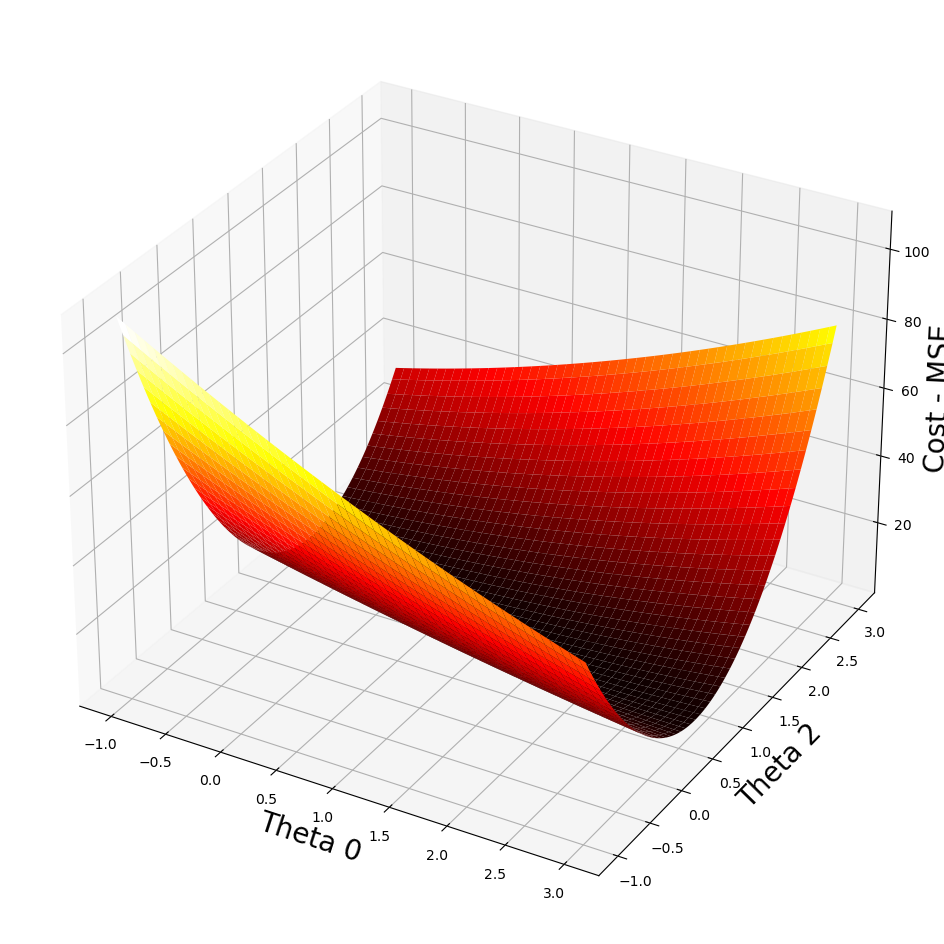

In [749]:
#Plotting MSE 
fig = plt.figure(figsize=[16,12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 2', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [758]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91] is:', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91] is:', plot_t1[111][91])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] is: 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] is: 1.2311557788944723


# Partial Derivatives of MSE with respect to $\theta_0$ and $\theta_1$

# $$\frac {\partial MSE} {\partial \theta_0} = -\frac {2} {n} \sum_ {i=1} ^{n} \big (y^{(i)}- \theta_0 - \theta_1x^{(i)}\big) $$
# $$\frac {\partial MSE} {\partial \theta_1} = -\frac {2} {n} \sum_ {i=1} ^{n} \big (y^{(i)}- \theta_0 - \theta_1x^{(i)}\big)(x^{(i)} \big)$$

## MSE  & Gradient Descent

In [762]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size
    theta0_slope = (-2/n)*sum(y-thetas[0]-thetas[1]*x)
    theta1_slope = (-2/n)*sum((y-thetas[0]-thetas[1]*x)*x)
    # return np.array([theta0_slope[0], theta1_slope[0]])
    # return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope),axis=0)


In [766]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

#Collect data points for scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0]+thetas[1]*x_5)

for i in range (1000):
    thetas = thetas - multiplier*grad(x_5, y_5, thetas)
    #Append the new values to numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0]+thetas[1]*x_5))

print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is: ', mse(y_5, thetas[0]+thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is:  [0.94797511]


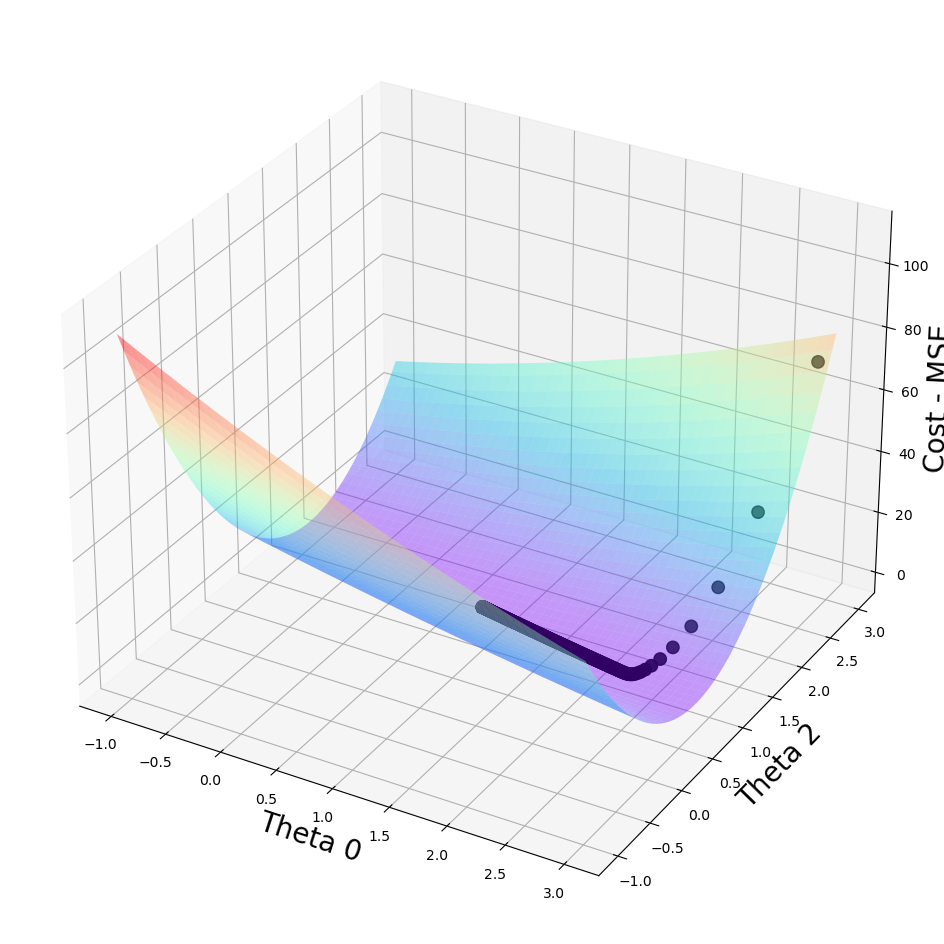

In [773]:
#Plotting MSE 
fig = plt.figure(figsize=[16,12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 2', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:,0], plot_vals[:,1], mse_vals, s=80, color='black')

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()